In [1]:
#T-SNE plotting of SPecies under Gryllus Genus

import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA #PCA'd results are pushed into t-SNE algorithm


In [3]:
# 1. Load the data from the .pt file.
# Specify the file path to your data file (e.g., "your_data.pt")
file_path = r"/gpfs/proj1/choe_lab/tanu/Species_classification/features_extracted/9_species/with_band_pass_filter/test/cricket_data_feature_extracted.pt"

# Load the data using torch.load() and assign it to a variable
data = torch.load(file_path) # Load your data, assuming it contains both spectrograms and labels



In [4]:

print(type(data))
print(len(data))
print(data[0])
print(data[0]["array"].shape)

<class 'list'>
988
{'array': array([[-1.2775939 , -1.2775939 , -1.2775939 , ..., -0.06692787,
        -0.11456262, -0.10012668],
       [-1.2775939 , -1.2775939 , -1.2775939 , ..., -0.07882945,
        -0.10893779, -0.2332645 ],
       [-1.2775939 , -1.2775939 , -1.2775939 , ..., -0.08546656,
        -0.13467082, -0.11205074],
       ...,
       [ 0.46703237,  0.46703237,  0.46703237, ...,  0.46703237,
         0.46703237,  0.46703237],
       [ 0.46703237,  0.46703237,  0.46703237, ...,  0.46703237,
         0.46703237,  0.46703237],
       [ 0.46703237,  0.46703237,  0.46703237, ...,  0.46703237,
         0.46703237,  0.46703237]], dtype=float32), 'label': 'Gryllus lineaticeps'}
(1024, 128)


In [40]:
spectrograms = np.array([sample['array'].flatten() for sample in data])
labels = [sample['label'] for sample in data]

In [41]:
# print(len(labels))
# print(labels)

In [42]:
print(spectrograms.shape)

(3130, 131072)


In [7]:
#Class Distribution on train set

In [8]:
# A dictionary to keep the count of each species samples
species_sample_count = {}
for label in labels:
    label = label.split()[1]
    if label not in species_sample_count:
        species_sample_count[label] = 1
    else:
        species_sample_count[label] += 1

species_sample_count = dict(sorted(species_sample_count.items(), key = lambda item: item[1]))
print(len(species_sample_count))
print(species_sample_count)

9
{'cohni': 107, 'fultoni': 118, 'leei': 168, 'assimilis': 191, 'integer': 319, 'firmus': 479, 'lineaticeps': 496, 'armatus': 557, 'lightfooti': 1266}


In [9]:
4775/11

434.09090909090907

In [11]:
class_distribution = {}
for species,count in species_sample_count.items():
    distr = (count/len(labels))*100
    #print(distr)
    class_distribution[species] = distr

class_distribution = dict(sorted(class_distribution.items(), key = lambda item: item[1]))
print(class_distribution)    

{'cohni': 2.891110510672791, 'fultoni': 3.1883274790597134, 'leei': 4.539313699000271, 'assimilis': 5.160767360172926, 'integer': 8.619292083220751, 'firmus': 12.942447987030533, 'lineaticeps': 13.401783301810323, 'armatus': 15.049986490137801, 'lightfooti': 34.206971088894896}


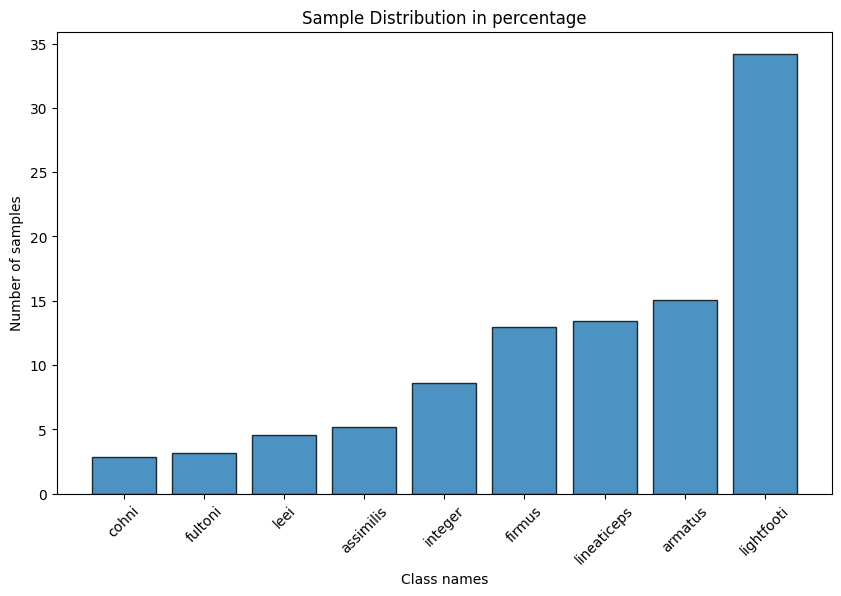

In [12]:
#plot the class distribution

classes = list(class_distribution.keys())
samples = list(class_distribution.values())

#create a histogram
plt.figure(figsize = (10,6))
plt.bar(classes, samples, edgecolor = 'black', alpha = 0.8)
plt.xlabel("Class names")
plt.ylabel("Number of samples")
plt.title("Sample Distribution in percentage")
plt.xticks(rotation = 45) #rotate x-axis labels for readability

plt.show()

In [ ]:
#Apply PCA

In [43]:
#5 species
num_components = 2000 ##reduce to 2000 dimensions. Original dimension is very high (131072)
pca = PCA(n_components = num_components)
spec_pca_2000 = pca.fit_transform(spectrograms)
print("TOTAL EXPLAINED VARIANCE WITH " + str(num_components)
+ " components = " +  str(sum(pca.explained_variance_ratio_)))

TOTAL EXPLAINED VARIANCE WITH 2000 components = 0.9723962644129642


In [31]:
#3 species
num_components = 2000 ##reduce to 2000 dimensions. Original dimension is very high (131072)
pca = PCA(n_components = num_components)
spec_pca_2000 = pca.fit_transform(spectrograms)
print("TOTAL EXPLAINED VARIANCE WITH " + str(num_components)
+ " components = " +  str(sum(pca.explained_variance_ratio_)))

TOTAL EXPLAINED VARIANCE WITH 2000 components = 0.9921413699375989


In [13]:
#9_species
num_components = 2000 ##reduce to 2000 dimensions. Original dimension is very high (131072)
pca = PCA(n_components = num_components)
spec_pca_2000 = pca.fit_transform(spectrograms)
print("TOTAL EXPLAINED VARIANCE WITH " + str(num_components)
+ " components = " +  str(sum(pca.explained_variance_ratio_)))

TOTAL EXPLAINED VARIANCE WITH 2000 components = 0.9635396937028418


In [ ]:
#TSNE plot for PCA to 2000 dimensions

In [44]:
spec_tsne_2000 = TSNE(
    n_components=2, perplexity=30.0, ##feel free to tune hyperparameters
    n_iter=5000, random_state = 42).fit_transform(spec_pca_2000)

In [45]:
print(spec_pca_2000[0])
print(type(spec_tsne_2000))
print(spec_pca_2000.shape)
print(spec_tsne_2000.shape)
print(spec_tsne_2000)

[ 4.472127    7.402383   -5.516501   ... -0.32676566  0.3145899
 -0.61965495]
<class 'numpy.ndarray'>
(3130, 2000)
(3130, 2)
[[  5.936665    4.7605762]
 [  1.7142316  -4.22134  ]
 [  5.6477923   2.3381698]
 ...
 [-65.529144  -23.244093 ]
 [ 64.75723    20.884922 ]
 [ 42.50437    21.246656 ]]


In [46]:
def tsneData_with_labels(spec_tsne):
  data_with_labels = []
  for i in range(len(spec_tsne)):
      data_point = spec_tsne[i]
      label = labels[i].split()[1]  # Get the label from the original list of labels
      data_with_labels.append((data_point, label))

  return data_with_labels


In [47]:
#for 5 species
data_with_labels_5 = tsneData_with_labels(spec_tsne_2000)
print(len(data_with_labels_5))
print(data_with_labels_5[0])

3130
(array([5.936665 , 4.7605762], dtype=float32), 'lineaticeps')


In [35]:
#for 3 species
data_with_labels_3 = tsneData_with_labels(spec_tsne_2000)
print(len(data_with_labels_3))
print(data_with_labels_3[0])

2273
(array([47.157894,  7.855792], dtype=float32), 'lineaticeps')


In [18]:
data_with_labels_9 = tsneData_with_labels(spec_tsne_2000)
print(len(data_with_labels_9))
print(data_with_labels_9[0])

3701
(array([-10.94407, -34.83403], dtype=float32), 'lineaticeps')


In [22]:
print(data_with_labels_9[0])

(array([-10.94407, -34.83403], dtype=float32), 'lineaticeps')


In [48]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming your data is stored in data_with_labels_2000
# data_with_labels_2000 is a list of tuples (array, label)

# Separate data and labels
data_points5, class_labels5 = zip(*data_with_labels_5)

# Convert to numpy array for easier manipulation
data_points5 = np.array(data_points5)
class_labels5 = np.array(class_labels5)

# Get unique class labels
unique_labels5 = np.unique(class_labels5)

# Define colors for each class
class_colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels5)))

buffer = 20

# Find overall axis limits for consistency
min_x, max_x = np.min(data_points5[:, 0]) - buffer, np.max(data_points5[:, 0]) + buffer
min_y, max_y = np.min(data_points5[:, 1]) - buffer, np.max(data_points5[:, 1]) + buffer

# Plot with all classes together
plt.figure(figsize=(10, 8))
for i, label in enumerate(unique_labels5):
    class_data = data_points5[class_labels5 == label]
    plt.scatter(class_data[:, 0], class_data[:, 1], color=class_colors[i], label=label, s= 10)

# Set overall axis limits
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)

# Add labels and legend
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Plot for 5 Classes')
plt.legend()

# Save the overall plot
output_directory = "/gpfs/proj1/choe_lab/tanu/Species_classification/TSNE_Plots/5_species/"
overall_plot_path = os.path.join(output_directory, 'overall_plot_5Species.png')
plt.savefig(overall_plot_path)
plt.close()

#plt.show()

# Create individual plots for each class with consistent axis limits
for i, label in enumerate(unique_labels5):
    # Select data points for the current class
    class_data = data_points5[class_labels5 == label]

    # Create a new figure for each class
    plt.figure()

    # Plot the t-SNE coordinates for the current class with the specified color
    plt.scatter(class_data[:, 0], class_data[:, 1], color=class_colors[i], label=label, s= 10)

    # Set consistent axis limits
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)

    # Add labels and title
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title(f't-SNE Plot for Class: {label}')

    # Add legend
    plt.legend()

    # Save the individual plot
    individual_plot_path = os.path.join(output_directory, f'individual_plot_{label}.png')
    plt.savefig(individual_plot_path)
    plt.close()



# Show the plots
plt.show()